<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from zipfile import ZipFile
import collections

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
!git clone https://github.com/ishaak15/UNSW-IDS-Feature-Selection.git

Cloning into 'UNSW-IDS-Feature-Selection'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 82 (delta 20), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (82/82), done.


In [3]:
cd UNSW-IDS-Feature-Selection/

/content/UNSW-IDS-Feature-Selection


In [4]:
ls

bayes_10.sav   clfKNN_all.sav                      Testset1.csv
bayes_20.sav   Copy_of_Training_and_Testing.ipynb  Testset2.csv
bayes_all.sav  Dataset1.csv                        Testset3.csv
clfDT_10.sav   Dataset2.csv                        Training_and_Testing.ipynb
clfDT_20.sav   Dataset3.csv                        UNSW_IDS_analysis.ipynb
clfDT_all.sav  LICENSE                             UNSW_NB15_testing-set.csv
clfKNN10.sav   Models_Training_and_Testing.ipynb
clfKNN20.sav   README.md


In [5]:
df1 = pd.read_csv('Dataset1.csv',index_col=0)
df2 = pd.read_csv('Dataset2.csv',index_col=0)
df3 = pd.read_csv('Dataset3.csv',index_col=0)

In [6]:
tf1 = pd.read_csv('Testset1.csv',index_col=0)
tf2 = pd.read_csv('Testset2.csv',index_col=0)
tf3 = pd.read_csv('Testset3.csv',index_col=0)

In [7]:
df1_xtrain=df1.iloc[: , :-1]
df1_ytrain=df1.iloc[:,-1]
df2_xtrain=df2.iloc[: , :-1]
df2_ytrain=df2.iloc[:,-1]
df3_xtrain=df3.iloc[: , :-1]
df3_ytrain=df3.iloc[:,-1]

In [8]:
df1_xtest=tf1.iloc[: , :-1]
df1_ytest=tf1.iloc[:,-1]
df2_xtest=tf2.iloc[: , :-1]
df2_ytest=tf2.iloc[:,-1]
df3_xtest=tf3.iloc[: , :-1]
df3_ytest=tf3.iloc[:,-1]

In [9]:
#KNN

In [10]:
clfKNN10=neighbors.KNeighborsClassifier()
clfKNN10.fit(df1_xtrain,df1_ytrain)
#clfKNN10.fit(df1_xtrain,df1_ytrain)

print ("\t\tKNN Classification of UNSW-NB15\n\n\t\tTop 15 Features ")

yt_pred_10 = clfKNN10.predict(df1_xtest)
results = confusion_matrix(df1_ytest, yt_pred_10) 
print ('Confusion Matrix :')
print(results) 


accKNN10=accuracy_score(df1_ytest,yt_pred_10)
print("Accuracy: ",accKNN10)
preKNN10=precision_score(df1_ytest, yt_pred_10, average='macro')
print("Precision Score: ",preKNN10)
f1KNN10=f1_score(df1_ytest, yt_pred_10, average='macro')
print("F1 Score: ",f1KNN10)
reKNN10=recall_score(df1_ytest, yt_pred_10, average='macro')  
print("Recall: ",reKNN10)


		KNN Classification of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  208   131    42    58   129    16    32    61     0     0]
 [  198   121    13    49   134    18    16    33     1     0]
 [  822   758   472   913   502    21   202   372    27     0]
 [  955   835   503  6664   944    39   616   540    33     3]
 [  444   315    97   469  3357    54  1111   164    50     1]
 [   17    11    34   375   168 18078   140    44     4     0]
 [  496    52   218  1986  7076    20 26822   233    93     4]
 [   82   102    51   324   117     5    71  2737     5     2]
 [    5     7    12    50   161     6    51    32    54     0]
 [    0     1     2    26    11     0     3     0     0     1]]
Accuracy:  0.7107078657144246
Precision Score:  0.41756373950870634
F1 Score:  0.4023931552335053
Recall:  0.44140047486900985


In [11]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df2_xtrain,df2_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_20 = clfKNN20.predict(df2_xtest)
results = confusion_matrix(df2_ytest, y_pred_20) 
print ('Confusion Matrix :')
print(results) 


accKNN20=accuracy_score(df2_ytest,y_pred_20)
print("Accuracy: ",accKNN20)
preKNN20=precision_score(df2_ytest, y_pred_20, average='macro')
print("Precision Score: ",preKNN20)
f1KNN20=f1_score(df2_ytest, y_pred_20, average='macro')
print("F1 Score: ",f1KNN20)
reKNN20=recall_score(df2_ytest, y_pred_20, average='macro')  
print("Recall: ",reKNN20)


		KNN Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  267   167    15    69   117    16    17     9     0     0]
 [  251   109     6    65   118    18    11     5     0     0]
 [ 1150  1136   184   646   494    22   307   129    21     0]
 [ 1321  1139   396  4316  1854    39  1749   290    28     0]
 [  599   332   140  2053  1702    56  1023   122    35     0]
 [   30    22    26   304   220 18083   132    51     3     0]
 [  132    71   537  7955  4981    21 22760   473    69     1]
 [  126   152    91   985   400     7   405  1325     5     0]
 [    7     6    13   109   126     5    52    17    43     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5925885439440315
Precision Score:  0.3273066113090913
F1 Score:  0.3053129978339978
Recall:  0.336096541715301


In [12]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df3_xtrain,df3_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tAll Features ")

y_pred_all = clfKNN20.predict(df3_xtest)
results = confusion_matrix(df3_ytest, y_pred_all) 
print ('Confusion Matrix :')
print(results) 


accKNNall=accuracy_score(df3_ytest, y_pred_all)
print("Accuracy: ",accKNNall)
preKNNall=precision_score(df3_ytest, y_pred_all, average='macro')
print("Precision Score: ",preKNNall)
f1KNNall=f1_score(df3_ytest, y_pred_all, average='macro')
print("F1 Score: ",f1KNNall)
reKNNall=recall_score(df3_ytest, y_pred_all, average='macro')  
print("Recall: ",reKNNall)


		KNN Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  336   161     1    44   101    16    17     1     0     0]
 [  304    98     1    44   105    18    11     2     0     0]
 [ 1491  1070   101   581   437    22   305    61    21     0]
 [ 1671  1073   319  4245  1794    39  1743   220    28     0]
 [  726   307   123  2007  1672    56  1024   112    35     0]
 [   37    21    26   301   219 18083   130    51     3     0]
 [  115    55   537  7955  5009    21 22765   473    69     1]
 [  164   146    81   981   392     7   405  1315     5     0]
 [    6     3    13   109   132     5    50    16    44     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5910095710051985
Precision Score:  0.3265665197965294
F1 Score:  0.3034833731074776
Recall:  0.34123127222810123


In [13]:
#Decision TREE

In [14]:
clfDT_10 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

# Train Decision Tree Classifer
clfDT_10 = clfDT_10.fit(df1_xtrain,df1_ytrain)

#Predict the response for test dataset
y_pred_DT10 = clfDT_10.predict(df1_xtest)


#print ("\t\tMajor Verifcation")
results_DT10 = confusion_matrix(df1_ytest, y_pred_DT10) 
print ('Confusion Matrix :')
print(results_DT10) 


accDT10=accuracy_score(df1_ytest, y_pred_DT10)
preDT10=precision_score(df1_ytest, y_pred_DT10, average='macro')
f1DT10=f1_score(df1_ytest, y_pred_DT10, average='macro')
reDT10=recall_score(df1_ytest, y_pred_DT10, average='macro')

print ('Accuracy Score :',accDT10 )
print("Precision Score: ",preDT10)
print("F1 Score: ",f1DT10)
print("Recall: ",reDT10)



		Decision Tree Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  375    82     1     8   185     0    24     2     0     0]
 [  316    56     3    12   186     0     7     0     3     0]
 [ 1480  1033   530   527   369    29    63    19    35     4]
 [ 1695   961   595  6540   619    86   256   223   142    15]
 [  719   137   157   531  2897    54  1294     9   262     2]
 [   18    23    71   217    56 18437    22     4    17     6]
 [  593    10  1107  1179  7342    84 26502    33   149     1]
 [  158   151    32   271    41     5    35  2762    37     4]
 [    1     7    15    43    30     6    13     4   259     0]
 [    0     1     0    14     0     1     1     0     1    26]]
Accuracy Score : 0.7091288927755915
Precision Score:  0.48143083408558124
F1 Score:  0.4837114772349092
Recall:  0.5604387913711979


In [15]:
clfDT_20 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

# Train Decision Tree Classifer
clfDT_20 = clfDT_20.fit(df2_xtrain,df2_ytrain)

#Predict the response for test dataset
y_pred_DT20 = clfDT_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation")
results_DT20 = confusion_matrix(df2_ytest, y_pred_DT20) 
print ('Confusion Matrix :')
print(results_DT20)

accDT20=accuracy_score(df2_ytest, y_pred_DT20)
preDT20=precision_score(df2_ytest, y_pred_DT20, average='macro')
f1DT20=f1_score(df2_ytest, y_pred_DT20, average='macro')
reDT20=recall_score(df2_ytest, y_pred_DT20, average='macro')

print ('Accuracy Score :',accDT20 )
print("Precision Score: ",preDT20)
print("F1 Score: ",f1DT20)
print("Recall: ",reDT20)

		Decision Tree Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  507   112     0    41     1     3    10     0     3     0]
 [  493    52     3    12    11     2     6     0     4     0]
 [ 1750  1025   556   498    96    42    62    25    35     0]
 [ 2106   968   571  6421   182    99   282   396    99     8]
 [ 1070   148    80   354  2672    27  1516    17   177     1]
 [   26    23    54   210    35 18481    17     6    14     5]
 [  661    11  1233  1527  7403    71 25906    44   143     1]
 [  167   145    30   265    27     5    29  2778    49     1]
 [    1    10    17    48    27     2    17     4   252     0]
 [    0     1     2    15     0     1     0     2     1    22]]
Accuracy Score : 0.7001773308069766
Precision Score:  0.4922532905878535
F1 Score:  0.48624590124125167
Recall:  0.5632429411793531


In [16]:
clfDT_all = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tAll Features ")

# Train Decision Tree Classifer
clfDT_all = clfDT_all.fit(df3_xtrain,df3_ytrain)

#Predict the response for test dataset
y_pred_DTall = clfDT_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation")
results_DTall = confusion_matrix(df3_ytest, y_pred_DTall) 
print ('Confusion Matrix :')
print(results_DTall)

accDTall=accuracy_score(df3_ytest, y_pred_DTall)
preDTall=precision_score(df3_ytest, y_pred_DTall, average='macro')
f1DTall=f1_score(df3_ytest, y_pred_DTall, average='macro')
reDTall=recall_score(df3_ytest, y_pred_DTall, average='macro')

print ('Accuracy Score :', accDTall)
print("Precision Score: ",preDTall)
print("F1 Score: ",f1DTall)
print("Recall: ",reDTall)

		Decision Tree Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  497   113     1    53     0     1    11     0     1     0]
 [  490    56     1     8     5     2    17     0     4     0]
 [ 1715  1111   543   497    71    34    57    26    35     0]
 [ 2078  1039   547  6513   158    97   371   227    93     9]
 [ 1049   173    85   356  2668    21  1561     6   143     0]
 [   26    21    70   243    42 18423    19     5    17     5]
 [  710    10   154   774  7421    28 27730    43   127     3]
 [  167   160    31   284    16     6    39  2748    44     1]
 [    2     4    13    54    31     3    13     4   254     0]
 [    0     0     5    13     0     1     0     1     1    23]]
Accuracy Score : 0.7221372006024389
Precision Score:  0.5197796621174776
F1 Score:  0.49975205235130915
Recall:  0.569460562025378


In [17]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [18]:
print(df1_ytrain.unique())

[6 1 0 4 8 7 3 2 9 5]


In [19]:
bayes_10 = MultinomialNB()
#bayes_10.partial_fit(df1_xtrain,df1_ytrain,df1_ytrain.unique())
bayes_10.fit(df1_xtrain,df1_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")
y_pred_gnb10 = bayes_10.predict(df1_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df1_ytest, y_pred_gnb10) 
print ('Confusion Matrix :')
print(results) 

accbayes_10=accuracy_score(df1_ytest, y_pred_gnb10) 
prebayes_10=precision_score(df1_ytest, y_pred_gnb10, average='macro')
f1bayes_10=f1_score(df1_ytest, y_pred_gnb10, average='macro')
rebayes_10=recall_score(df1_ytest, y_pred_gnb10, average='macro')

print ('Accuracy Score :',accbayes_10)
print("Precision Score: ",prebayes_10)
print("F1 Score: ",f1bayes_10)
print("Recall: ",rebayes_10)


		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  601     0     0    14     0     1    61     0     0     0]
 [  483     0     0    38     1     2    59     0     0     0]
 [ 2473     0     0   510    72    78   934    10    12     0]
 [ 2697     0     0  1738   125    56  6494     2    20     0]
 [ 1222     0     0   752   550   374  3111     7    46     0]
 [   28     0     0   109    95 18159   475     1     4     0]
 [  193     0     1  4062  1501  2792 28284    18   149     0]
 [ 1541     0     0    68     8    15  1858     6     0     0]
 [   75     0     0     1    36     9   192     6    59     0]
 [    0     0     0     2     4     2    36     0     0     0]]
Accuracy Score : 0.5999732789194967
Precision Score:  0.23827456767032631
F1 Score:  0.2239561902839405
Recall:  0.30190991296773395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [20]:
bayes_20 = MultinomialNB()
bayes_20.fit(df2_xtrain,df2_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_gnb20 = bayes_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df2_ytest, y_pred_gnb20) 
print ('Confusion Matrix :')
print(results)

accbayes_20=accuracy_score(df2_ytest, y_pred_gnb20) 
prebayes_20=precision_score(df2_ytest, y_pred_gnb20, average='macro')
f1bayes_20=f1_score(df2_ytest, y_pred_gnb20, average='macro')
rebayes_20=recall_score(df2_ytest, y_pred_gnb20, average='macro')

print ('Accuracy Score :',accbayes_20)
print("Precision Score: ",prebayes_20)
print("F1 Score: ",f1bayes_20)
print("Recall: ",rebayes_20)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  585     0    73 14651     0  5965  7847     1     1  7877]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.3825244133508235
Precision Score:  0.1947161142507347
F1 Score:  0.135809387243145
Recall:  0.19951131812748615


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [21]:
bayes_all = MultinomialNB()
bayes_all.fit(df3_xtrain,df3_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tAll Features ")
y_pred_gnball = bayes_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df3_ytest, y_pred_gnball) 
print ('Confusion Matrix :')
print(results)

accbayes_all=accuracy_score(df3_ytest, y_pred_gnball)
prebayes_all=precision_score(df3_ytest, y_pred_gnball, average='macro')
f1bayes_all=f1_score(df3_ytest, y_pred_gnball, average='macro')
rebayes_all=recall_score(df3_ytest, y_pred_gnball, average='macro')

print ('Accuracy Score :', accbayes_all)
print("Precision Score: ",prebayes_all)
print("F1 Score: ",f1bayes_all)
print("Recall: ",rebayes_all)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  615     0    14 14654     0  6027  7813     1     1  7875]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.38211145119759027
Precision Score:  0.1988094523267321
F1 Score:  0.13564830638485165
Recall:  0.19941942623559425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [22]:
#Random Forest Classifier 


In [23]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

#Create a Gaussian Classifier
clfRF_10=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_10.fit(df1_xtrain,df1_ytrain)

y_pred_RF10=clfRF_10.predict(df1_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_10 = confusion_matrix(df1_ytest, y_pred_RF10) 
print ('Confusion Matrix :')
print(results_10) 

accclfRF_10=accuracy_score(df1_ytest, y_pred_RF10)
preclfRF_10=precision_score(df1_ytest, y_pred_RF10, average='macro')
f1clfRF_10=f1_score(df1_ytest, y_pred_RF10, average='macro')
reclfRF_10=recall_score(df1_ytest, y_pred_RF10, average='macro')

print ('Accuracy Score :',accclfRF_10 )
print("Precision Score: ",preclfRF_10)
print("F1 Score: ",f1clfRF_10)
print("Recall: ",reclfRF_10)

		Random Forest Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[   63   123     6    59   373     0    34    16     3     0]
 [   55    80     6    22   383     2    26     2     7     0]
 [  445  1258   456   813   812    18    51   191    44     1]
 [  447  1177   146  7522  1264    18   172   301    80     5]
 [  152   229    21   434  3971     9   987    23   236     0]
 [    6     8    43   398    66 18314    11     6    17     2]
 [  291     1    63   714  7410     7 28377    11   125     1]
 [   49   161    24   312    99     0    17  2803    31     0]
 [    0     1    11    45    33     0    11     3   273     1]
 [    0     0     0    20     1     1     1     0     0    21]]
Accuracy Score : 0.7515911188845164
Precision Score:  0.5458887402438959
F1 Score:  0.504794488285499
Recall:  0.5411269748105987


In [24]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

#Create a Gaussian Classifier
clfRF_20=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_20.fit(df2_xtrain,df2_ytrain)

y_pred_RF20=clfRF_20.predict(df2_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_20 = confusion_matrix(df2_ytest, y_pred_RF20) 
print ('Confusion Matrix :')
print(results_20)

accclfRF_20=accuracy_score(df2_ytest, y_pred_RF20) 
preclfRF_20=precision_score(df2_ytest, y_pred_RF20, average='macro')
f1clfRF_20=f1_score(df2_ytest, y_pred_RF20, average='macro')
reclfRF_20=recall_score(df2_ytest, y_pred_RF20, average='macro')

print ('Accuracy Score :',accclfRF_20)
print("Precision Score: ",preclfRF_20)
print("F1 Score: ",f1clfRF_20)
print("Recall: ",reclfRF_20)

		Random Forest Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[   73   187    16    49   256     0    19    74     3     0]
 [   70   121    21    25   260     0     3    77     6     0]
 [  444  1408   515   783   679     7     9   199    45     0]
 [  496  1357   179  7581   957    12    92   387    67     4]
 [  169   335    43   391  3879     2   869   149   225     0]
 [    1     9    40   377    61 18347     4    10    19     3]
 [  443     1    34   750  7711     6 27934     4   116     1]
 [   52   173    29   308    79     0    13  2817    25     0]
 [    0     0     8    55    43     0     6     1   264     1]
 [    0     0     0    29     1     1     2     0     0    11]]
Accuracy Score : 0.7474857892435505
Precision Score:  0.5282397757263719
F1 Score:  0.48362148667116694
Recall:  0.5243617247192811


In [25]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tAll Features ")

#Create a Random Forest Classifier
clfRF_all=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_all.fit(df3_xtrain,df3_ytrain)

y_pred_RFall=clfRF_all.predict(df3_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_all = confusion_matrix(df3_ytest, y_pred_RFall) 
print ('Confusion Matrix :')
print(results_all)

accclfRF_all=accuracy_score(df3_ytest, y_pred_RFall) 
preclfRF_all=precision_score(df3_ytest, y_pred_RFall, average='macro')
f1clfRF_all=f1_score(df3_ytest, y_pred_RFall, average='macro')
reclfRF_all=recall_score(df3_ytest, y_pred_RFall, average='macro')

print ('Accuracy Score :',accclfRF_all)
print("Precision Score: ",preclfRF_all)
print("F1 Score: ",f1clfRF_all)
print("Recall: ",reclfRF_all)

		Random Forest Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[   41   233    11    58   224     0     9    98     3     0]
 [   41   150    13    26   244     0     2   100     7     0]
 [  344  1712   459   764   542     6    32   180    50     0]
 [  384  1650   137  7577   809    16    97   386    75     1]
 [  104   407    28   337  3833     3   912   201   237     0]
 [    2     9    42   398    59 18324     7     5    22     3]
 [  498     0    31   707  7694     6 27929     6   128     1]
 [   42   209    22   312    71     1    12  2801    26     0]
 [    0     0     8    55    42     0     8     3   261     1]
 [    0     0     0    31     2     1     2     0     0     8]]
Accuracy Score : 0.7455545838799009
Precision Score:  0.5291308284971128
F1 Score:  0.4704574540704611
Recall:  0.514240082051188


In [ ]:
#Logistic Regression Classifier 


In [42]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

logisticRegr_10 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_10.fit(df1_xtrain,df1_ytrain)

y_pred_LR10 = logisticRegr_10.predict(df1_xtest)

results_LR10 = confusion_matrix(df1_ytest, y_pred_LR10) 
print ('Confusion Matrix :')
print(results_LR10) 

acclogisticRegr_10=accuracy_score(df1_ytest, y_pred_LR10)
prelogisticRegr_10=precision_score(df1_ytest, y_pred_LR10, average='macro')
f1logisticRegr_10=f1_score(df1_ytest, y_pred_LR10, average='macro')
relogisticRegr_10=recall_score(df1_ytest, y_pred_LR10, average='macro')

print ('Accuracy Score :',acclogisticRegr_10 )
print("Precision Score: ",prelogisticRegr_10)
print("F1 Score: ",f1logisticRegr_10)
print("Recall: ",relogisticRegr_10)

		Logistic Regression Analysis of UNSW-NB15

		Top 15 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    67   603     1     4     2     0     0]
 [    0     0     0    30   534     2    10     7     0     0]
 [    0     0     0   701  3023    53   229    83     0     0]
 [    0     0     4  5355  4777    36   873    87     0     0]
 [    0     0     0   190  4906   347   574    45     0     0]
 [    0     0     0   244   520 17912   186     9     0     0]
 [    0     0     0  4280 10600  2693 19298   129     0     0]
 [    0     0     0   118  3345    19     6     8     0     0]
 [    0     0     0    17   343     6     0    12     0     0]
 [    0     0     0     0    33     2     9     0     0     0]]
Accuracy Score : 0.576677355098868
Precision Score:  0.24395420989882374
F1 Score:  0.2330576404871651
Recall:  0.2763386674857679


In [43]:
print ("\t\tLogistic Regression Analysis of UNSW NB15\n\n\t\tTop 30 Features ")

logisticRegr_20 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_20.fit(df2_xtrain,df2_ytrain)

y_pred_LR20 = logisticRegr_20.predict(df2_xtest)

results_LR20 = confusion_matrix(df2_ytest, y_pred_LR20) 
print ('Confusion Matrix :')
print(results_LR20) 

acclogisticRegr_20=accuracy_score(df2_ytest, y_pred_LR20)
prelogisticRegr_20=precision_score(df2_ytest, y_pred_LR20, average='macro')
f1logisticRegr_20=f1_score(df2_ytest, y_pred_LR20, average='macro')
relogisticRegr_20=recall_score(df2_ytest, y_pred_LR20, average='macro')

print ('Accuracy Score :',acclogisticRegr_20 )
print("Precision Score: ",prelogisticRegr_20)
print("F1 Score: ",f1logisticRegr_20)
print("Recall: ",relogisticRegr_20)


		Logistic Regression Analysis of UNSW NB15

		Top 30 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    24   618     2    33     0     0     0]
 [    0     0     0    21   527     5    30     0     0     0]
 [    0     0    12   465  2920   123   568     1     0     0]
 [    0     0     3  2640  4041   122  4323     3     0     0]
 [    0     0     0  1354  3715   379   614     0     0     0]
 [    0     0     1   177   224 18168   301     0     0     0]
 [    0     0     0  4308 10244  2806 19639     3     0     0]
 [    0     0     0   425  2851    45   175     0     0     0]
 [    0     0     0    72   234    33    39     0     0     0]
 [    0     0     0    12    19     2    11     0     0     0]]
Accuracy Score : 0.5365350046154593
Precision Score:  0.27752510329555236
F1 Score:  0.20200551358150495
Recall:  0.23464537572388955


In [44]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tAll Features ")

logisticRegr_all = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

logisticRegr_all.fit(df3_xtrain,df3_ytrain)

y_pred_LRall = logisticRegr_all.predict(df3_xtest)

results_LRall = confusion_matrix(df3_ytest, y_pred_LRall) 
print ('Confusion Matrix :')
print(results_LRall)

acclogisticRegr_all=accuracy_score(df3_ytest, y_pred_LRall)
prelogisticRegr_all=precision_score(df3_ytest, y_pred_LRall, average='macro')
f1logisticRegr_all=f1_score(df3_ytest, y_pred_LRall, average='macro')
relogisticRegr_all=recall_score(df3_ytest, y_pred_LRall, average='macro')

print ('Accuracy Score :', acclogisticRegr_all)
print("Precision Score: ",prelogisticRegr_all)
print("F1 Score: ",f1logisticRegr_all)
print("Recall: ",relogisticRegr_all)


		Logistic Regression Analysis of UNSW-NB15

		All Features 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



Confusion Matrix :
[[    0     0     3     2   613     2    57     0     0     0]
 [    0     0    10    19   493     5    56     0     0     0]
 [    0     0   143   326  2577   136   907     0     0     0]
 [    0     0   146  1682  2851   126  6327     0     0     0]
 [    0     0    42   885  2071   387  2677     0     0     0]
 [    0     0    10   116   127 18168   450     0     0     0]
 [    0     0     7  3840  2397  2825 27931     0     0     0]
 [    0     0    26   179  1537    45  1709     0     0     0]
 [    0     0     0    27   150    35   166     0     0     0]
 [    0     0     0     8     4     2    30     0     0     0]]
Accuracy Score : 0.6072365544381285
Precision Score:  0.22974356478427999
F1 Score:  0.20854342565061423
Recall:  0.224534320313942


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [26]:
#CNN 1D
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [27]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [28]:
X = df1_xtrain
Y = df1_ytrain
C = df1_ytest
T = df1_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df1_xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_shape=(15, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15, 10)            20        
_________________________________________________________________
flatten (Flatten)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,182
Trainable params: 5,182
Non-trainable params: 0
_________________________________________________________________


In [29]:
historyNN10 = model.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.4081 - accuracy: 0.4911 - f1_m: 0.4293 - precision_m: 0.6581 - recall_m: 0.3225
Epoch 2/100
3367/3367 [==============================] - 5s 2ms/step - loss: 1.1789 - accuracy: 0.5390 - f1_m: 0.5085 - precision_m: 0.7649 - recall_m: 0.3847
Epoch 3/100
3367/3367 [==============================] - 5s 2ms/step - loss: 1.1114 - accuracy: 0.5728 - f1_m: 0.5332 - precision_m: 0.8057 - recall_m: 0.4029
Epoch 4/100
3367/3367 [==============================] - 5s 2ms/step - loss: 1.0582 - accuracy: 0.6074 - f1_m: 0.5707 - precision_m: 0.8215 - recall_m: 0.4416
Epoch 5/100
3367/3367 [==============================] - 5s 2ms/step - loss: 1.0070 - accuracy: 0.6281 - f1_m: 0.6130 - precision_m: 0.8297 - recall_m: 0.4901
Epoch 6/100
3367/3367 [==============================] - 5s 2ms/step - loss: 0.9781 - accuracy: 0.6393 - f1_m: 0.6280 - precision_m: 0.8390 - recall_m: 0.5058
Epoch 7/100
3367/3367 [=======================

In [30]:
loss_NN10, accNN10, f1_score_NN10, precision_NN10, recall_NN10 = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN10))
print("Testing Precision: {:.4f}".format(precision_NN10))
print("Testing Recall: {:.4f}".format(recall_NN10))
print("Testing F1-Score: {:.4f}".format(f1_score_NN10))

2573/2573 [==============================] - 3s 1ms/step - loss: 1.0485 - accuracy: 0.7192 - f1_m: 0.6984 - precision_m: 0.8085 - recall_m: 0.6463
Testing Accuracy: 0.7192
Testing Precision: 0.8085
Testing Recall: 0.6463
Testing F1-Score: 0.6984


In [31]:
df2_xtrain.shape[1]

30

In [32]:
X = df2_xtrain
Y = df2_ytrain
C = df2_ytest
T = df2_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df2_xtrain.shape[1]  # Number of features

model1 = Sequential()
model1.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30, 10)            20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                9632      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 9,982
Trainable params: 9,982
Non-trainable params: 0
_________________________________________________________________


In [33]:
historyNN20 = model1.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.5170 - accuracy: 0.4845 - f1_m: 0.3072 - precision_m: 0.5351 - recall_m: 0.2456
Epoch 2/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3605 - accuracy: 0.5056 - f1_m: 0.3960 - precision_m: 0.6799 - recall_m: 0.2957
Epoch 3/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3573 - accuracy: 0.5040 - f1_m: 0.3986 - precision_m: 0.6485 - recall_m: 0.2965
Epoch 4/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3553 - accuracy: 0.5044 - f1_m: 0.3954 - precision_m: 0.6452 - recall_m: 0.2910
Epoch 5/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3543 - accuracy: 0.5024 - f1_m: 0.3880 - precision_m: 0.6563 - recall_m: 0.2808
Epoch 6/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3424 - accuracy: 0.5069 - f1_m: 0.3933 - precision_m: 0.6829 - recall_m: 0.2823
Epoch 7/100
3367/3367 [=======================

In [34]:
loss20, accNN20, f1_score_NN20, precision_NN20, recall_NN20 = model1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN20))
print("Testing Precision: {:.4f}".format(precision_NN20))
print("Testing Recall: {:.4f}".format(recall_NN20))
print("Testing F1-Score: {:.4f}".format(f1_score_NN20))

2573/2573 [==============================] - 4s 1ms/step - loss: 1.0744 - accuracy: 0.5660 - f1_m: 0.4942 - precision_m: 0.7058 - recall_m: 0.4342
Testing Accuracy: 0.5660
Testing Precision: 0.7058
Testing Recall: 0.4342
Testing F1-Score: 0.4942


In [35]:
X = df3_xtrain
Y = df3_ytrain
C = df3_ytest
T = df3_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df3_xtrain.shape[1]  # Number of features

model2 = Sequential()
model2.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 42, 10)            20        
_________________________________________________________________
flatten_2 (Flatten)          (None, 420)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                13472     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 13,822
Trainable params: 13,822
Non-trainable params: 0
_________________________________________________________________


In [36]:
historyNNall = model2.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.4499 - accuracy: 0.4974 - f1_m: 0.3410 - precision_m: 0.6334 - recall_m: 0.2645
Epoch 2/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3559 - accuracy: 0.5054 - f1_m: 0.3979 - precision_m: 0.6673 - recall_m: 0.2973
Epoch 3/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3500 - accuracy: 0.5068 - f1_m: 0.4027 - precision_m: 0.6651 - recall_m: 0.2975
Epoch 4/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3420 - accuracy: 0.5053 - f1_m: 0.3963 - precision_m: 0.7043 - recall_m: 0.2822
Epoch 5/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3322 - accuracy: 0.5032 - f1_m: 0.4061 - precision_m: 0.7425 - recall_m: 0.2880
Epoch 6/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3057 - accuracy: 0.5085 - f1_m: 0.4319 - precision_m: 0.7770 - recall_m: 0.3080
Epoch 7/100
3367/3367 [=======================

In [37]:
loss_NNall, accNNall, f1_score_NNall, precision_NNall, recall_NNall = model2.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNNall))
print("Testing Precision: {:.4f}".format(precision_NNall))
print("Testing Recall: {:.4f}".format(recall_NNall))
print("Testing F1-Score: {:.4f}".format(f1_score_NNall))

2573/2573 [==============================] - 4s 1ms/step - loss: 1.0328 - accuracy: 0.5895 - f1_m: 0.5100 - precision_m: 0.7479 - recall_m: 0.4442
Testing Accuracy: 0.5895
Testing Precision: 0.7479
Testing Recall: 0.4442
Testing F1-Score: 0.5100


In [38]:
#Ada Boost with DT
from sklearn.ensemble import AdaBoostClassifier


In [39]:
print ("\t\tAdaBoost using Decision Tree Analysis of UNSW NB15\n\n\t\tTop 15 Features ")



abc10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=500)
abc10.fit(df1_xtrain, df1_ytrain)

#Predict the response for test dataset
y_pred_Ada10 = abc10.predict(df1_xtest)


results_Ada10 = confusion_matrix(df1_ytest, y_pred_Ada10) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc10=accuracy_score(df1_ytest, y_pred_Ada10)
preabc10=precision_score(df1_ytest, y_pred_Ada10, average='macro')
f1abc10=f1_score(df1_ytest, y_pred_Ada10, average='macro')
reabc10=recall_score(df1_ytest, y_pred_Ada10, average='macro')

print ('Accuracy Score :', accabc10)
print("Precision Score: ",preabc10)
print("F1 Score: ",f1abc10)
print("Recall: ",reabc10)

		AdaBoost using Decision Tree Analysis of UNSW NB15

		Top 15 Features 
Confusion Matrix :
[[  281     4    60    51   206     0    62    13     0     0]
 [  179     6    61    97   214     1     8    13     4     0]
 [ 1862   134   237   854   525    69   168   200    38     2]
 [ 1854   155   390  6189   859   253   868   517    44     3]
 [  539    12   134   370  1076     2  3825    66    36     2]
 [   12     2    49   804    41 17849    89    15    10     0]
 [  440    23   170   908  3039    18 32249    20   127     6]
 [  216    28    22   196    78     7    87  2842    20     0]
 [    0     0    25    50    44     0    45    15   199     0]
 [    0     1     0    31     4     3     1     0     2     2]]
Accuracy Score : 0.7400524704853519
Precision Score:  0.4258598142157197
F1 Score:  0.41227831822646416
Recall:  0.4419058463727786


In [40]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

abc20 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",n_estimators=500)
abc20.fit(df2_xtrain, df2_ytrain)

y_pred_Ada20 = abc20.predict(df2_xtest)



results_Ada10 = confusion_matrix(df2_ytest, y_pred_Ada20) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc20=accuracy_score(df2_ytest, y_pred_Ada20)
preabc20=precision_score(df2_ytest, y_pred_Ada20, average='macro')
f1abc20=f1_score(df2_ytest, y_pred_Ada20, average='macro')
reabc20=recall_score(df2_ytest, y_pred_Ada20, average='macro')

print ('Accuracy Score :', accabc20)
print("Precision Score: ",preabc20)
print("F1 Score: ",f1abc20)
print("Recall: ",reabc20)


		AdaBoost using DT Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  424    57     3    18    44     0    55    76     0     0]
 [  359    45    15    24    51    11     4    71     3     0]
 [ 1378   689   331   926   328    32   108   252    39     6]
 [ 1640   687  1031  6096   478   219   363   553    40    25]
 [  826   133    82   151  1658    11  2933   194    53    21]
 [   13     6   260   370    56 18059    87     7    12     1]
 [  658     6   307   638  5201    27 30030    14   101    18]
 [  133   110    59   241    86     7    34  2820     5     1]
 [    0     2    36    54    45     0    36    12   193     0]
 [    0     0     5    31     2     2     2     0     0     2]]
Accuracy Score : 0.7246028275761551
Precision Score:  0.42216095049288327
F1 Score:  0.42151037141227066
Recall:  0.4736811250635452


In [41]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tAll Features ")

abcall = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=500)

abcall.fit(df3_xtrain,df3_ytrain)

y_pred_Adaall = abcall.predict(df3_xtest)

results_Adaall = confusion_matrix(df3_ytest, y_pred_Adaall) 
print ('Confusion Matrix :')
print(results_Adaall)

accabcall=accuracy_score(df3_ytest, y_pred_Adaall)
preabcall=precision_score(df3_ytest, y_pred_Adaall, average='macro')
f1abcall=f1_score(df3_ytest, y_pred_Adaall, average='macro')
reabcall=recall_score(df3_ytest, y_pred_Adaall, average='macro')

print ('Accuracy Score :', accabcall)
print("Precision Score: ",preabcall)
print("F1 Score: ",f1abcall)
print("Recall: ",reabcall)

		AdaBoost using DT Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  249    47   164    14    21    34    26   122     0     0]
 [  187    89   159    23    26    10     0    89     0     0]
 [  977   503   493   591   129   142   139  1115     0     0]
 [ 1516   832   956  3556   150   892  1299  1930     0     1]
 [  441   648   724  1154  1237   999   233   626     0     0]
 [   17    42    75   356     6 14065    41  4269     0     0]
 [ 2178  1236  1812  4189  5753  1274 15575  4983     0     0]
 [   85   129    52    69    20    14     2  3125     0     0]
 [    0    67    72   168     6     0     0    65     0     0]
 [    0     0     5    11     0     1     0    27     0     0]]
Accuracy Score : 0.4662707088373901
Precision Score:  0.2594977036850702
F1 Score:  0.24182434495918598
Recall:  0.32246708489366177


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
!pip install vecstack

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=d4333f1f13e4a743b90b7a9085b66baa4113a5dd021602362dbd136fa22c5a25
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [46]:
models_XGB = [
    KNeighborsClassifier(),
        
    RandomForestClassifier(n_estimators=500, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [47]:
S_train, S_test = stacking(models_XGB, df1_xtrain, df1_ytrain, df1_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73357156]
    fold  1:  [0.74108966]
    fold  2:  [0.73417487]
    fold  3:  [0.73937256]
    fold  4:  [0.74043995]
    ----
    MEAN:     [0.73772972] + [0.00320190]
    FULL:     [0.73772972]

model  1:     [RandomForestClassifier]
    fold  0:  [0.72558938]
    fold  1:  [0.73208650]
    fold  2:  [0.72647113]
    fold  3:  [0.73454613]
    fold  4:  [0.72985892]
    ----
    MEAN:     [0.72971041] + [0.00336238]
    FULL:     [0.72971041]

model  2:     [XGBClassifier]
    fold  0:  [0.78893633]
    fold  1:  [0.79547986]
    fold  2:  [0.79650084]
    fold  3:  [0.79961017]
    fold  4:  [0.79520141]
    ----
    MEAN:     [0.79514572] + [0.00347675]
    FULL:     [0.79514572]



In [48]:
model_XGB1 = XGBClassifier(random_state=1, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=300, max_depth=3)
    
model_XGB1 = model_XGB1.fit(S_train, df1_ytrain)

y_pred_XGB1 = model_XGB1.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, y_pred_XGB1))

results_XGB1 = confusion_matrix(df1_ytest, y_pred_XGB1) 
print ('Confusion Matrix :')
print(results_XGB1) 

accXGB10=accuracy_score(df1_ytest, y_pred_XGB1)
preXGB10=precision_score(df1_ytest, y_pred_XGB1, average='macro')
f1XGB10=f1_score(df1_ytest, y_pred_XGB1, average='macro')
reXGB10=recall_score(df1_ytest, y_pred_XGB1, average='macro')

print ('Accuracy Score :', accXGB10)
print("Precision Score: ",preXGB10)
print("F1 Score: ",f1XGB10)
print("Recall: ",reXGB10)

Final prediction score: [0.73414]
Confusion Matrix :
[[    1     0     0     8   613     0    52     3     0     0]
 [    1    21     1    32   513     0     7     4     4     0]
 [    8    46    70  1026  2786     2    44    45    62     0]
 [    7    29    32  7274  3233     0   307   182    66     2]
 [    1     7     1   138  4825     0   941    54    95     0]
 [    0     4    13   495   163 18159    18     8    10     1]
 [    1     0    17  1076  8764     0 27035    33    73     1]
 [    2     6     2   291   348     0     6  2828    13     0]
 [    0     1     2    55    65     0    10    30   215     0]
 [    0     0     1    22     5     0     1     0     0    15]]
Accuracy Score : 0.7341373949375698
Precision Score:  0.5687654692981967
F1 Score:  0.47229960499373336
Recall:  0.49155527405923394


In [49]:
S_train2, S_test2 = stacking(models_XGB, df2_xtrain, df2_ytrain, df2_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

model_XGB2 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB2 = model_XGB2.fit(S_train2, df2_ytrain)

y_pred_XGB2 = model_XGB2.predict(S_test2)

print('Final prediction score: [%.5f]' % accuracy_score(df2_ytest, y_pred_XGB2))




results_XGB2 = confusion_matrix(df2_ytest, y_pred_XGB2) 
print ('Confusion Matrix :')
print(results_XGB2) 

accXGB20=accuracy_score(df2_ytest, y_pred_XGB2)
preXGB20=precision_score(df2_ytest, y_pred_XGB2, average='macro')
f1XGB20=f1_score(df2_ytest, y_pred_XGB2, average='macro')
reXGB20=recall_score(df2_ytest, y_pred_XGB2, average='macro')

print ('Accuracy Score :',accXGB20 )
print("Precision Score: ",preXGB20)
print("F1 Score: ",f1XGB20)
print("Recall: ",reXGB20)



task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56775571]
    fold  1:  [0.56798775]
    fold  2:  [0.56993689]
    fold  3:  [0.56432151]
    fold  4:  [0.57156117]
    ----
    MEAN:     [0.56831260] + [0.00243047]
    FULL:     [0.56831260]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69932244]
    fold  1:  [0.70642287]
    fold  2:  [0.71111008]
    fold  3:  [0.71802487]
    fold  4:  [0.73087990]
    ----
    MEAN:     [0.71315203] + [0.01075854]
    FULL:     [0.71315203]

model  2:     [XGBClassifier]
    fold  0:  [0.79394839]
    fold  1:  [0.80165213]
    fold  2:  [0.79974940]
    fold  3:  [0.80466865]
    fold  4:  [0.80230184]
    ----
    MEAN:     [0.80046408] + [0.00361752]
    FULL:     [0.80046408]

Final prediction score: [0.73310]
Confusion Matrix :
[[   77   215     0     1   322     0    57     2     3     0]
 [   25

In [50]:

S_train3, S_test3 = stacking(models_XGB, df3_xtrain, df3_ytrain, df3_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)


model_XGB3 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB3 = model_XGB3.fit(S_train3, df3_ytrain)

y_pred_XGB3 = model_XGB3.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df3_ytest, y_pred_XGB3))




results_XGB3 = confusion_matrix(df3_ytest, y_pred_XGB3) 
print ('Confusion Matrix :')
print(results_XGB3)

accXGBall=accuracy_score(df3_ytest, y_pred_XGB3)
preXGBall=precision_score(df3_ytest, y_pred_XGB3, average='macro')
f1XGBall=f1_score(df3_ytest, y_pred_XGB3, average='macro')
reXGBall=recall_score(df3_ytest, y_pred_XGB3, average='macro')

print ('Accuracy Score :', accXGBall)
print("Precision Score: ",preXGBall)
print("F1 Score: ",f1XGBall)
print("Recall: ",reXGBall)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56682755]
    fold  1:  [0.56585298]
    fold  2:  [0.56835901]
    fold  3:  [0.56283646]
    fold  4:  [0.57040097]
    ----
    MEAN:     [0.56685539] + [0.00252940]
    FULL:     [0.56685539]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69811583]
    fold  1:  [0.70405606]
    fold  2:  [0.70470577]
    fold  3:  [0.70591238]
    fold  4:  [0.70572675]
    ----
    MEAN:     [0.70370336] + [0.00287484]
    FULL:     [0.70370336]

model  2:     [XGBClassifier]
    fold  0:  [0.79227771]
    fold  1:  [0.79956376]
    fold  2:  [0.79942454]
    fold  3:  [0.80517913]
    fold  4:  [0.79933172]
    ----
    MEAN:     [0.79915537] + [0.00409532]
    FULL:     [0.79915537]

Final prediction score: [0.71095]
Confusion Matrix :
[[  138     0     0     8   479     0    49     3     0     0]
 [   91

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
"""
level0 = list()
level0.append(('rf', RandomForestClassifier()))
#level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
# define meta learner model
print("Proceeding with: ",level0)
level1 = GradientBoostingClassifier(n_estimators=200)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
# fit the model on all available data
model.fit(df1_xtrain, df1_ytrain)
# make a prediction for one example

yhat = model.predict(df1_xtest)
#print('Predicted Class: %d' % (yhat))

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, yhat))

results_sc1 = confusion_matrix(df1_ytest, yhat) 
print ('Confusion Matrix :')
print(results_sc1) 

print ('Accuracy Score :',accuracy_score(df1_ytest, yhat) )
print("Precision Score: ",precision_score(df1_ytest, yhat, average='macro'))
print("F1 Score: ",f1_score(df1_ytest, yhat, average='macro'))
print("Recall: ",recall_score(df1_ytest, yhat, average='macro'))
"""

In [51]:
import matplotlib.pyplot as plt
import numpy as np

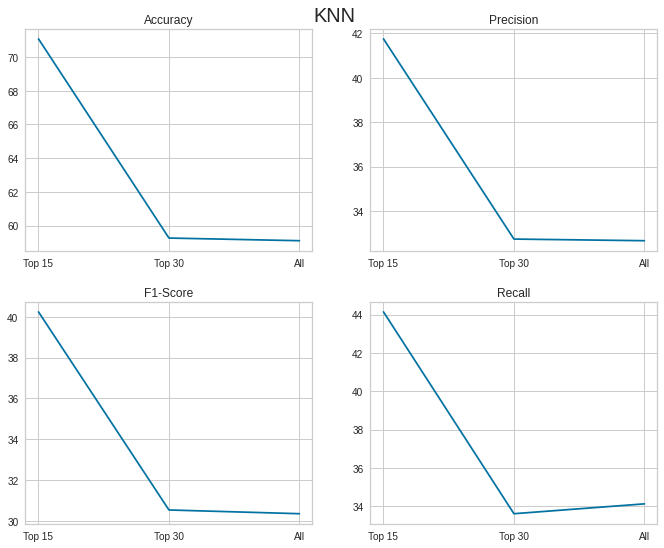

In [52]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accKNN10*100,accKNN20*100,accKNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preKNN10*100,preKNN20*100,preKNNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1KNN10*100,f1KNN20*100,f1KNNall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reKNN10*100,reKNN20*100,reKNNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('KNN',fontsize=20)

plt.show()

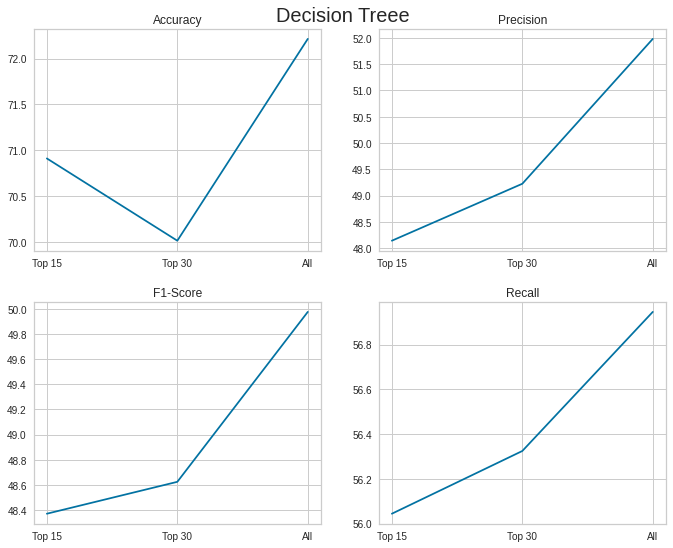

In [53]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Decision Treee',fontsize=20)

plt.show()

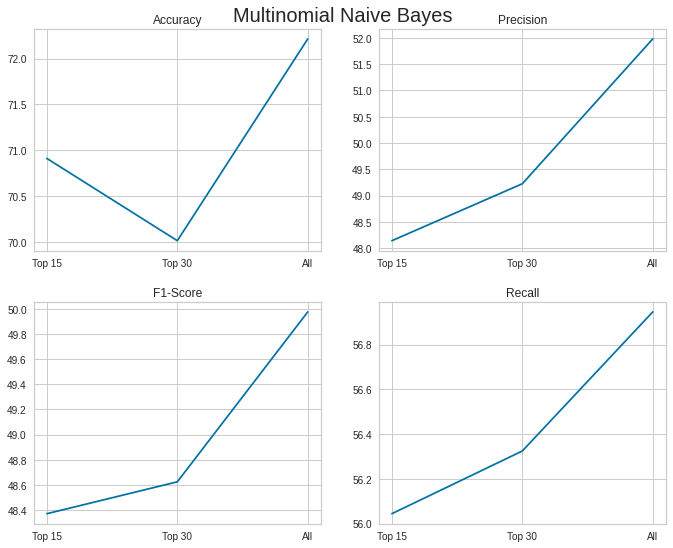

In [54]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Multinomial Naive Bayes',fontsize=20)

plt.show()

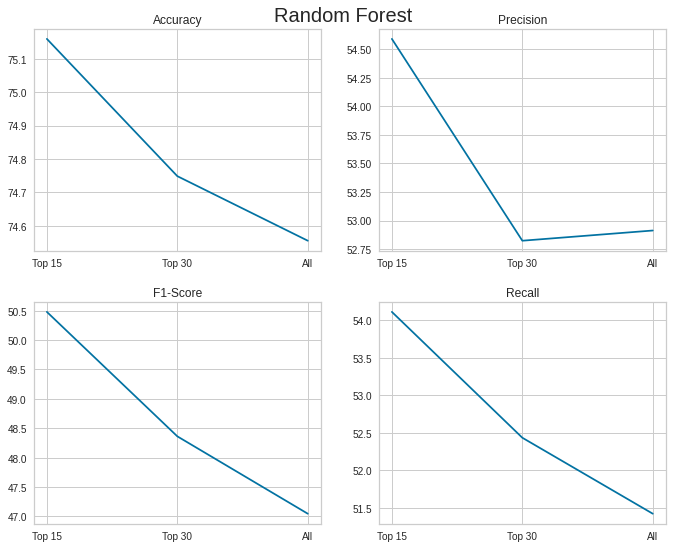

In [55]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accclfRF_10*100,accclfRF_20*100,accclfRF_all*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preclfRF_10*100,preclfRF_20*100,preclfRF_all*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1clfRF_10*100,f1clfRF_20*100,f1clfRF_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reclfRF_10*100,reclfRF_20*100,reclfRF_all*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Random Forest',fontsize=20)

plt.show()

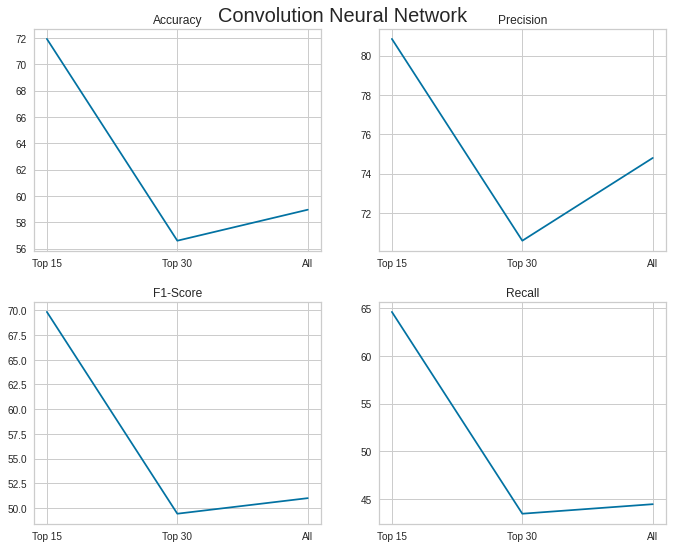

In [57]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accNN10*100,accNN20*100,accNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[precision_NN10*100,precision_NN20*100,precision_NNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1_score_NN10*100,f1_score_NN20*100,f1_score_NNall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[recall_NN10*100,recall_NN20*100,recall_NNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Convolution Neural Network',fontsize=20)

plt.show()

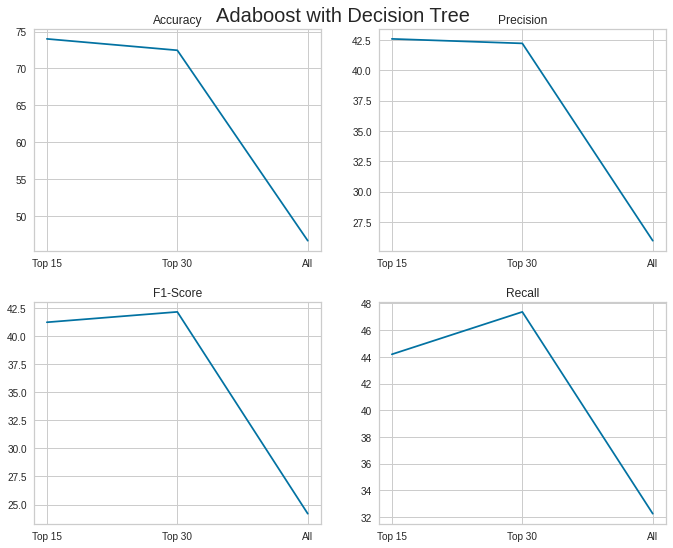

In [58]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accabc10*100,accabc20*100,accabcall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preabc10*100,preabc20*100,preabcall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1abc10*100,f1abc20*100,f1abcall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reabc10*100,reabc20*100,reabcall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Adaboost with Decision Tree',fontsize=20)

plt.show()

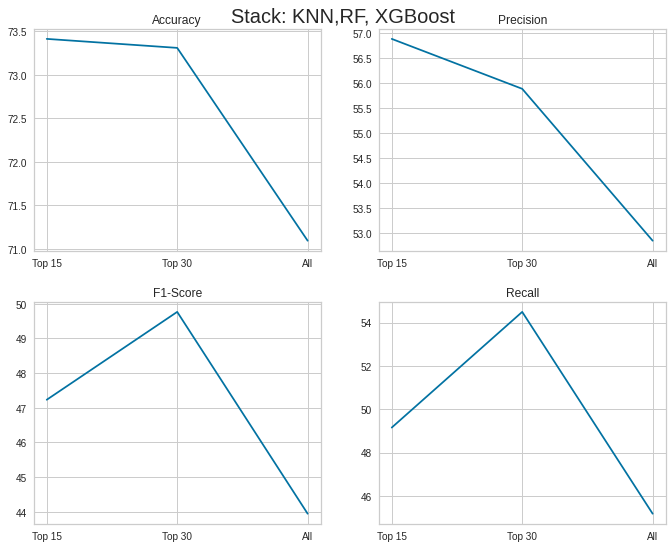

In [59]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accXGB10*100,accXGB20*100,accXGBall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preXGB10*100,preXGB20*100,preXGBall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1XGB10*100,f1XGB20*100,f1XGBall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reXGB10*100,reXGB20*100,reXGBall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Stack: KNN,RF, XGBoost',fontsize=20)

plt.show()

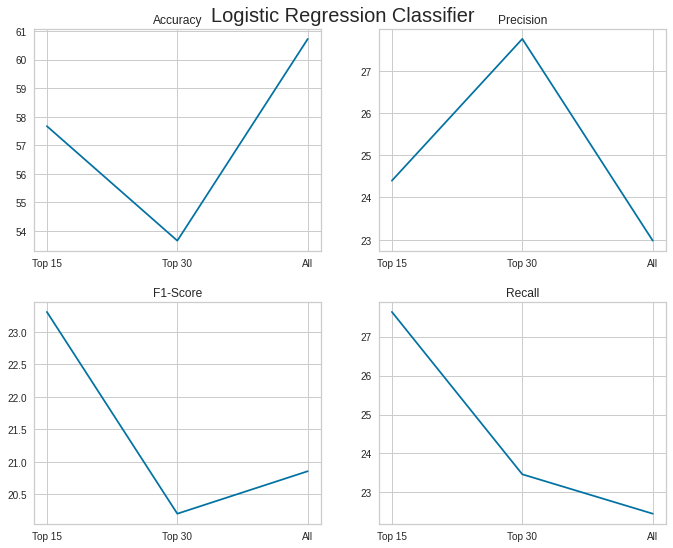

In [60]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[acclogisticRegr_10*100,acclogisticRegr_20*100,acclogisticRegr_all*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[prelogisticRegr_10*100,prelogisticRegr_20*100,prelogisticRegr_all*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1logisticRegr_10*100,f1logisticRegr_20*100,f1logisticRegr_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[relogisticRegr_10*100,relogisticRegr_20*100,relogisticRegr_all*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Logistic Regression Classifier',fontsize=20)

plt.show()

Accuracy


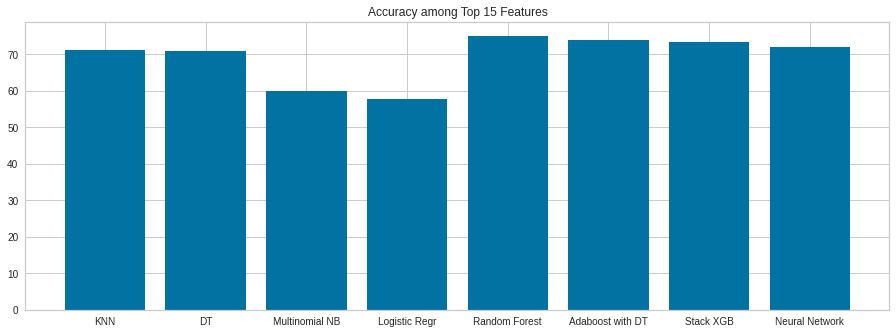

Precision


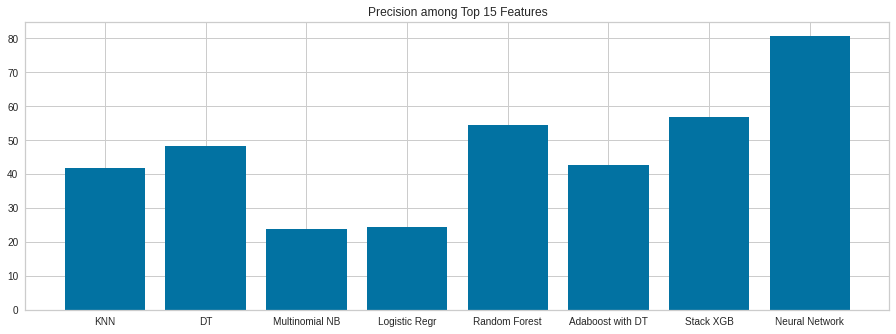

F1 Score


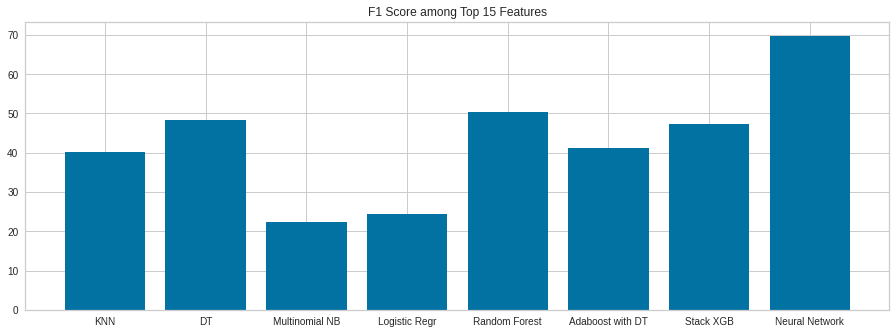

Recall


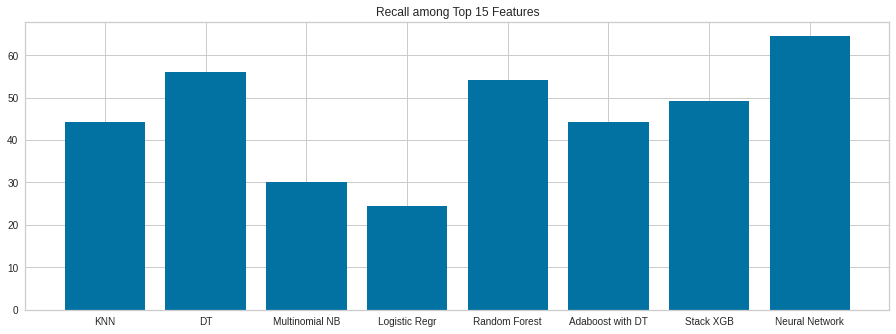

In [70]:
#Accuracy
print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNN10*100,accDT10*100,accbayes_10*100,acclogisticRegr_10*100,accclfRF_10*100,accabc10*100,accXGB10*100,accNN10*100]
ax.bar(algo,acc)
plt.title("Accuracy among Top 15 Features")
plt.show()
#Precision
print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNN10*100,preDT10*100,prebayes_10*100,prelogisticRegr_10*100,preclfRF_10*100,preabc10*100,preXGB10*100,precision_NN10*100]
ax.bar(algo,pre)
plt.title("Precision among Top 15 Features")
plt.show()
#F1 Score
print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNN10*100,f1DT10*100,f1bayes_10*100,prelogisticRegr_10*100,f1clfRF_10*100,f1abc10*100,f1XGB10*100,f1_score_NN10*100]
ax.bar(algo,f1)
plt.title("F1 Score among Top 15 Features")
plt.show()
#Recall
print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNN10*100,reDT10*100,rebayes_10*100,prelogisticRegr_10*100,reclfRF_10*100,reabc10*100,reXGB10*100,recall_NN10*100]
ax.bar(algo,re)
plt.title("Recall among Top 15 Features")
plt.show()

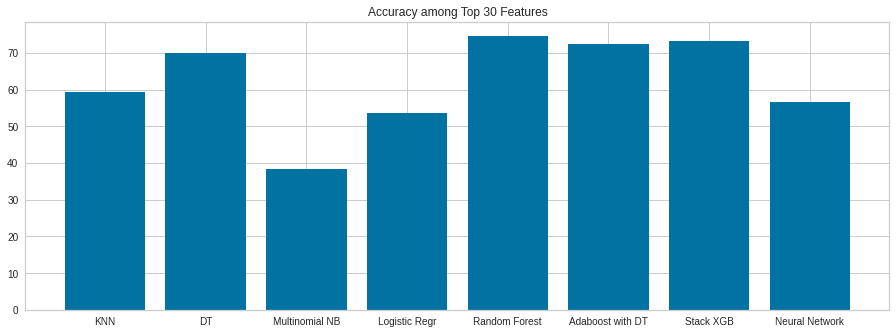

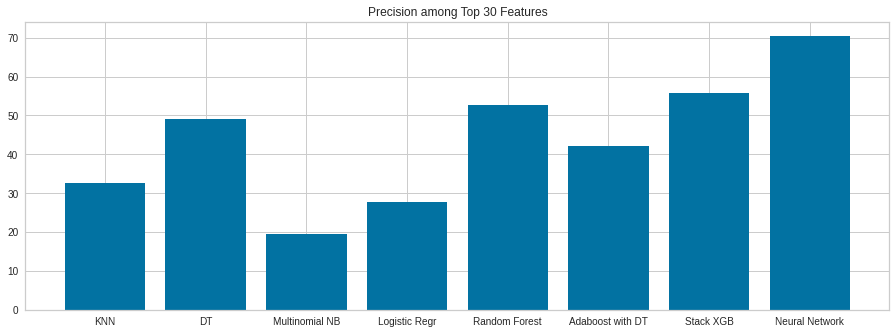

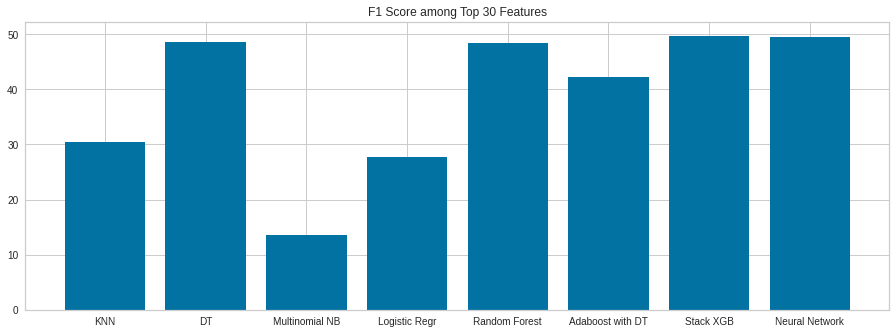

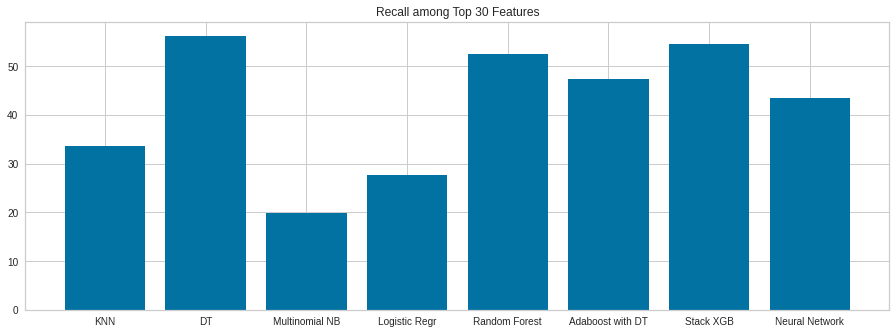

In [74]:
#Accuracy
#print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNN20*100,accDT20*100,accbayes_20*100,acclogisticRegr_20*100,accclfRF_20*100,accabc20*100,accXGB20*100,accNN20*100]
ax.bar(algo,acc)
plt.title("Accuracy among Top 30 Features")
plt.show()
#Precision
#print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNN20*100,preDT20*100,prebayes_20*100,prelogisticRegr_20*100,preclfRF_20*100,preabc20*100,preXGB20*100,precision_NN20*100]
ax.bar(algo,pre)
plt.title("Precision among Top 30 Features")
plt.show()
#F1 Score
#print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNN20*100,f1DT20*100,f1bayes_20*100,prelogisticRegr_20*100,f1clfRF_20*100,f1abc20*100,f1XGB20*100,f1_score_NN20*100]
ax.bar(algo,f1)
plt.title("F1 Score among Top 30 Features")
plt.show()
#Recall
#print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNN20*100,reDT20*100,rebayes_20*100,prelogisticRegr_20*100,reclfRF_20*100,reabc20*100,reXGB20*100,recall_NN20*100]
ax.bar(algo,re)
plt.title("Recall among Top 30 Features")
plt.show()

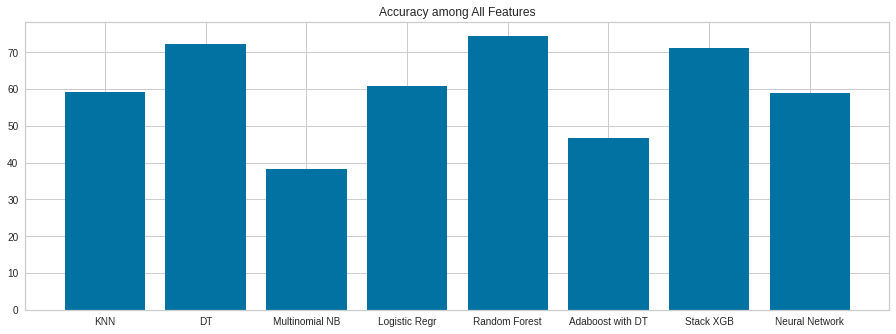

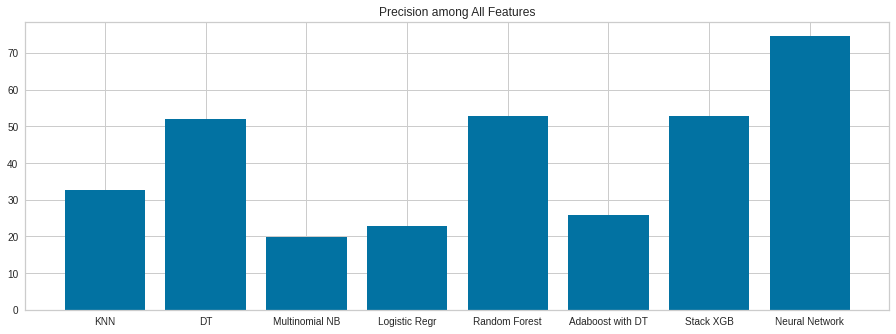

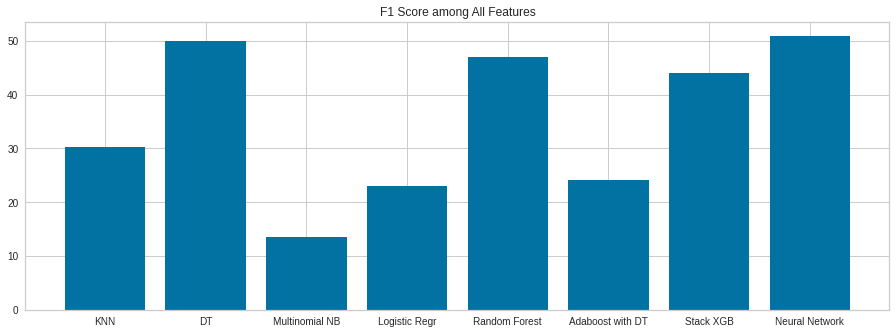

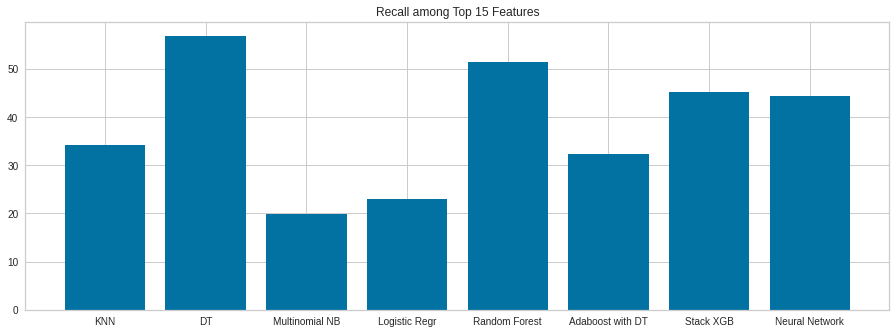

In [73]:
#Accuracy
#print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNNall*100,accDTall*100,accbayes_all*100,acclogisticRegr_all*100,accclfRF_all*100,accabcall*100,accXGBall*100,accNNall*100]
ax.bar(algo,acc)
plt.title("Accuracy among All Features")
plt.show()
#Precision
#print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNNall*100,preDTall*100,prebayes_all*100,prelogisticRegr_all*100,preclfRF_all*100,preabcall*100,preXGBall*100,precision_NNall*100]
ax.bar(algo,pre)
plt.title("Precision among All Features")
plt.show()
#F1 Score
#print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNNall*100,f1DTall*100,f1bayes_all*100,prelogisticRegr_all*100,f1clfRF_all*100,f1abcall*100,f1XGBall*100,f1_score_NNall*100]
ax.bar(algo,f1)
plt.title("F1 Score among All Features")
plt.show()
#Recall
#print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNNall*100,reDTall*100,rebayes_all*100,prelogisticRegr_all*100,reclfRF_all*100,reabcall*100,reXGBall*100,recall_NNall*100]
ax.bar(algo,re)
plt.title("Recall among Top 15 Features")
plt.show()